# 对比训练集和测试集的图像特征

In [33]:
import os, sys
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

this_path = os.path.abspath('.')
if this_path not in sys.path:
    sys.path.append(this_path)

utils_path = os.path.join(this_path, '../../../../code/utils')
if utils_path not in sys.path:
    sys.path.append(utils_path)

from img_features import *
from emc_operations import *

In [6]:
h5_file = glob(os.path.join(this_path, 'Gen*.hdf5'))[0]
hf = h5py.File(h5_file)

real_img = hf['real_shower']
fake_img = hf['gen_shower']

In [14]:
compare_data = {}
for func in [getEtot, getMax, getSecmom, getE5x5, getCenterE, getNhit]:
    df = pd.DataFrame()
    df['real_img'] = [func(img) for img in real_img]
    df['fake_img'] = [func(img) for img in fake_img]
    compare_data[func.__name__.lower()[3:]] = df.copy()   

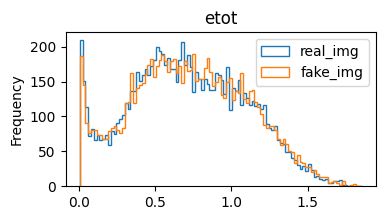

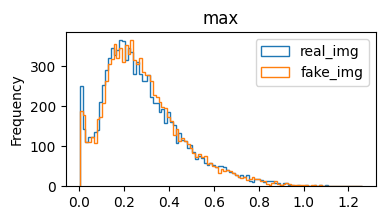

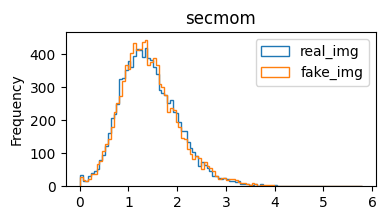

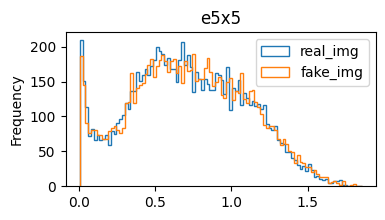

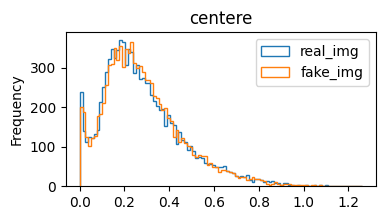

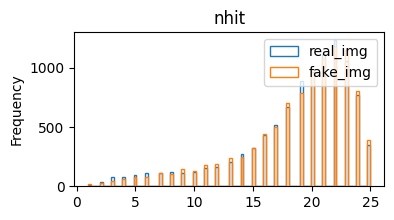

In [15]:
for k, data in compare_data.items():
    data.plot.hist(figsize=(4,2), bins=100, histtype='step', title=k)
    plt.show()

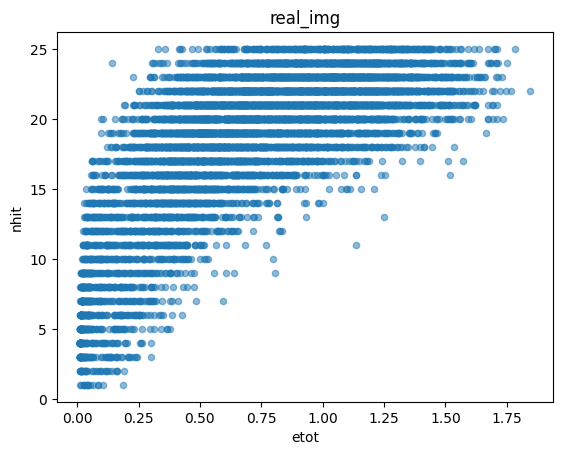

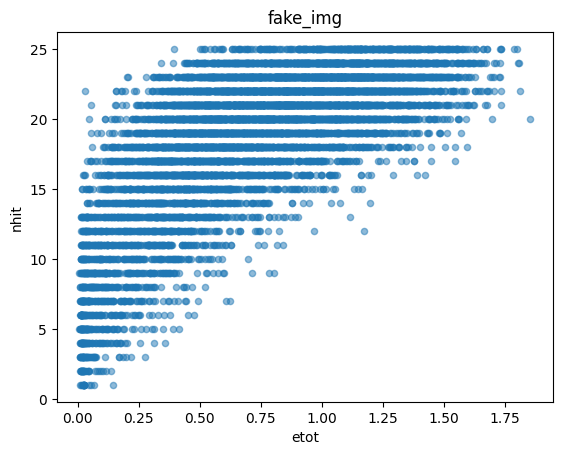

In [17]:
for label in ['real_img', 'fake_img']:
    tmp = pd.DataFrame({
        'etot': compare_data['etot'][label], 
        'nhit': compare_data['nhit'][label], 
    })
    tmp.plot.scatter('etot', 'nhit', alpha=0.5, title=label)

In [113]:
compare_data['etot'].shape[0] - compare_data['max'][compare_data['etot']<0.01].isna().sum()

real_img     5
fake_img    14
dtype: int64

<AxesSubplot:ylabel='Frequency'>

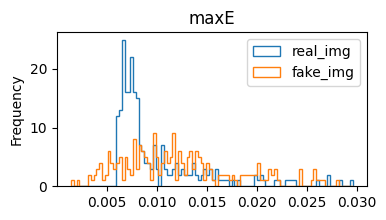

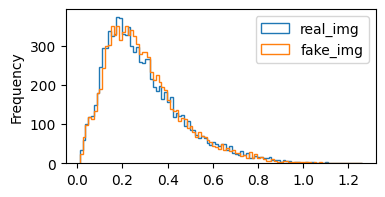

In [121]:
compare_data['max'][compare_data['etot']<0.03].plot.hist(figsize=(4,2), bins=100, histtype='step', title='maxE')
compare_data['max'][(compare_data['etot']>0.05) & (compare_data['etot']<2)].plot.hist(figsize=(4,2), bins=100, histtype='step')

etot=0.019222046830691397


<Figure size 640x480 with 0 Axes>

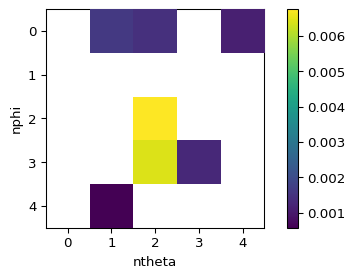

etot=0.011818030616268516


<Figure size 640x480 with 0 Axes>

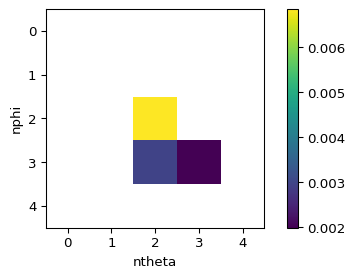

etot=0.009578702680300921


<Figure size 640x480 with 0 Axes>

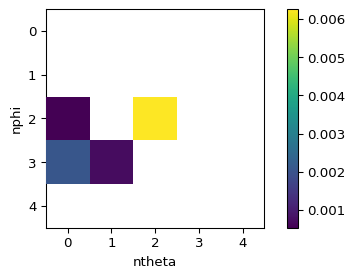

etot=0.016897601424716413


<Figure size 640x480 with 0 Axes>

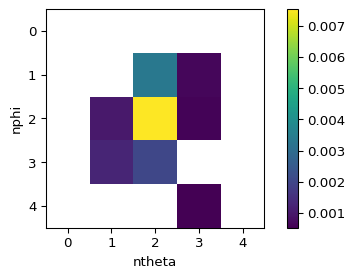

etot=0.010607835603877902


<Figure size 640x480 with 0 Axes>

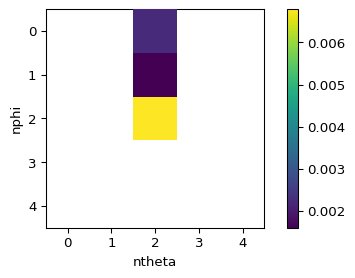

etot=0.017056593613233417


<Figure size 640x480 with 0 Axes>

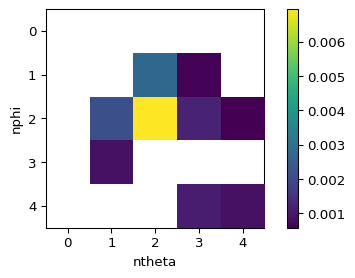

In [101]:
for i in range(200):
    if compare_data['etot']['real_img'].iloc[i] > 0.02:
        continue
    print('etot={}'.format(real_img[i].sum()))
    fig = showHitImg(real_img[i], figsize=(5,3))
    plt.show()

etot=0.014828411844425635


<Figure size 640x480 with 0 Axes>

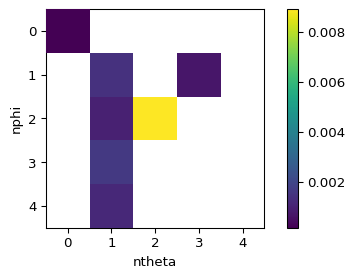

etot=0.01153855905297277


<Figure size 640x480 with 0 Axes>

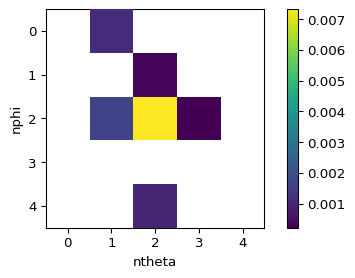

In [102]:
for i in range(200):
    if compare_data['etot']['fake_img'].iloc[i] > 0.02:
        continue
    print('etot={}'.format(fake_img[i].sum()))
    fig = showHitImg(np.where(fake_img[i]>1e-4, fake_img[i], np.nan), figsize=(5,3))
    plt.show()